<h1><center>ML Report Lab 3</center></h1>

### _Name_: ANKIT  DIMRI
### _Roll no_: 17BCS004

<h2><center>Linear regression on dataset with 10 values with actual function being sine and normal noise added to y.</center></h2>

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### create dataset 

In [2]:
# Create dataset
x = np.linspace (0, 2*np.pi, 10)

# Actual function
y = np.sin(x)

### Plot

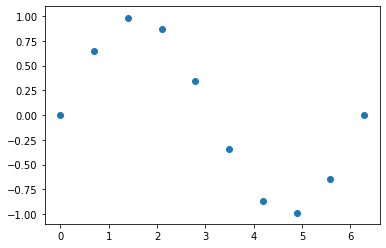

In [3]:
# Plotting the real function (scatter)
plt.scatter (x, y) 

### Create data with random normal noise added

In [4]:
# Creating dataset with random normal noise added to function
y_true = np.sin (x) + np.random.normal (0,0.09, 10)

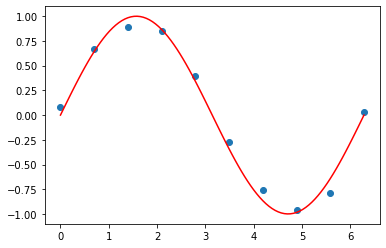

In [5]:
# Plot the real data (noised) with respect to actual sine function
plt.scatter (x, y_true)
val = np.linspace (0,2*np.pi, 100)
plt.plot (val, np.sin (val), color = "red")
plt.show ()

### A general function which takes data matrix input and passes it through m basis functions to make an M dimension data  matrix

In [6]:
# General functiont with take x data matrix of D dimension and o order to create a M dimension data natrix X

def data (x, m):
    
    df = []
    for i in x:
        z = []
        for j in range (m):
            z.append (i**j)
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [7]:
# Create data frame of data x with order 5 (passing through 5 ba)
df = data (x, 5)
df

,0,1,2,3,4
0,1.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.698132,0.487388,0.340261,0.237547
2,1.0,1.396263,1.949551,2.722087,3.800751
3,1.0,2.094395,4.386491,9.187045,19.241302
4,1.0,2.792527,7.798206,21.776699,60.812016
5,1.0,3.490659,12.184697,42.532615,148.466836
6,1.0,4.188790,17.545963,73.496360,307.860831
7,1.0,4.886922,23.882006,116.709497,570.350197
8,1.0,5.585054,31.192824,174.213593,972.992256
9,1.0,6.283185,39.478418,248.050213,1558.545457


### General function which takes the data matrix X and actual output Y as input and finds M dimensional weight matrix or parameters of the hypothesis function using matrix multiplication

<br>
<br>
<center> $W = ((X^{T}X)^{-1}X^{T}Y)$ </center>

In [8]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

### General Linear Regression function which takes X data matrix, Y actual value and Dimension m of the hyothesis to be fit on the data. It plots the fit.

In [13]:
def linear_regression (x, y, m):
    
    df = data (x, m)
    w = find_weights (df.values, y)
    
    plt.scatter (x, y, color = "grey")
    val = np.linspace (min (x), max(x), 100)
    plt.plot (val, np.matmul (data (val, m).values, w), color = "red")
    
    return w

### Curve with dimension 5 fitting the data we created (noised)

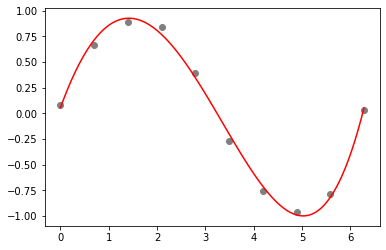

In [14]:
w = linear_regression (x, y_true, 5)

### Green - Actual Function
### Red - Predicted values for given x using our hypothesis
### Blue points - Our training dataset
### Green points - Predicted value for training data x using hypothesis

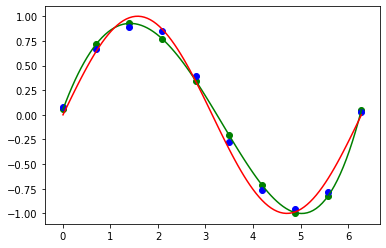

In [15]:
plt.scatter (x, np.matmul(df.values, w), color= "green")
val = np.linspace (0, 2*np.pi, 100)
plt.plot (val, np.matmul (data (val, 5).values, w), color = "green")
plt.scatter (x, y_true, color="blue")
plt.plot (val, np.sin (val), color = "red")
plt.show ()

## Creating a random dataset and fitting a curve with different order of hpothesis function using Linear Regression

In [16]:
dat = np.linspace (0, 10, 100)
t = 5*dat + 2 + np.random.normal (0, 5, 100)

### Plot for different values of m




Degree:  1


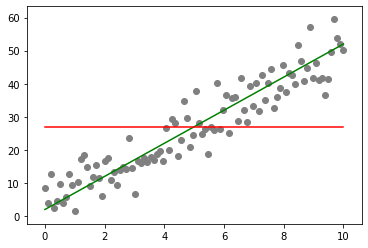




Degree:  2


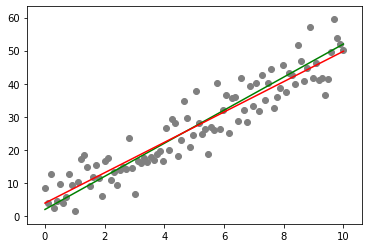




Degree:  3


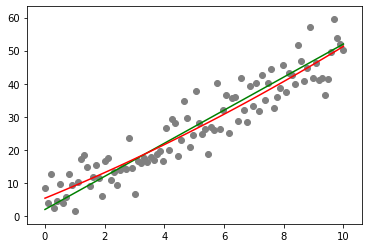




Degree:  4


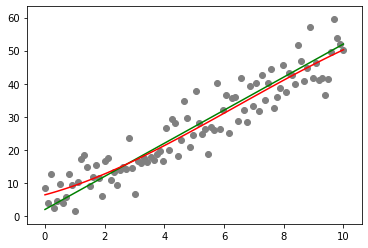




Degree:  5


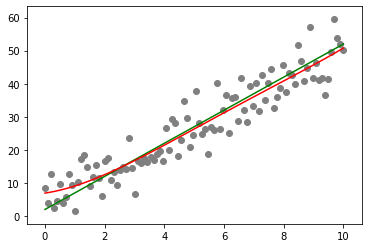




Degree:  6


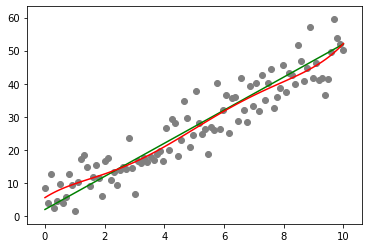




Degree:  7


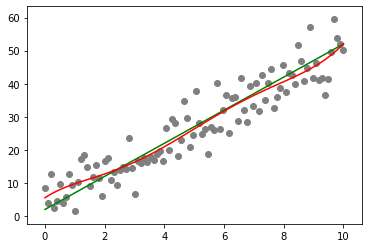




Degree:  8


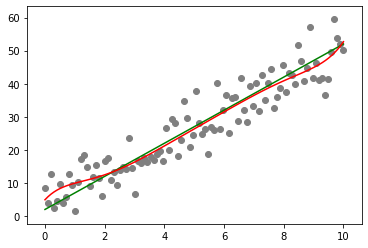




Degree:  9


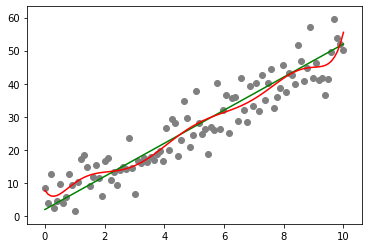




Degree:  10


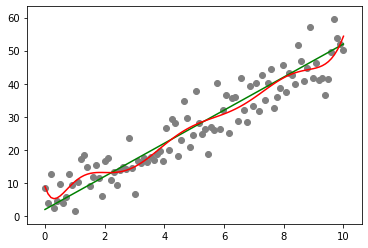




Degree:  11


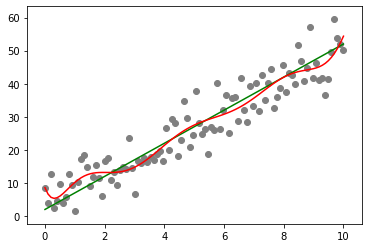




Degree:  12


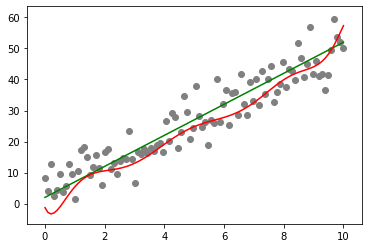

In [25]:
for i in range (1, 13):
    print ("\n\n")
    print ("Degree: ", i)
    # Actual line
    plt.plot (dat, 5*dat + 2, color = "green")
    
    # Derived line
    linear_regression (dat, t, i)
    plt.show ()